In [1]:
import pandas as pd 
pd.options.mode.chained_assignment = None 
import numpy as np  
seed = 0
np.random.seed(seed) 
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.metrics import accuracy_score
 
import datetime as dt  
import re  
import string  
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords   
 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  

from wordcloud import WordCloud   
 
import nltk 

nltk.data.path.append(r"C:\Users\acer\AppData\Roaming\nltk_data")

nltk.download('punkt')
nltk.download('punkt_tab') 
nltk.download('stopwords')

import csv
import requests
from io import StringIO

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from imblearn.over_sampling import SMOTE

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('gojek_reviews.csv')
df.head()

,content,score
0,saya kasih bintang rendah karna saya sudah mem...,2
1,mantab bbbbbbbb,5
2,tolong dibenerin dong. sy posisi didekat gojek...,1
3,150450🇸🇬. Sama 150450. Sekalian 150450 Punya Z...,5
4,Saya pesan di cancel terus,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  99999 non-null   object
 1   score    100000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [4]:
df.isnull().sum()

content    1
score      0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

content    0
score      0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(31457)

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(68542, 2)

In [9]:
slangwords = {
    "gk": "nggak",
    "ga": "tidak",
    "gak": "tidak",
    "ngga": "tidak",
    "nggak": "tidak",
    "tdk": "tidak",
    "sm": "sama",
    "tp": "tapi",
    "bgt": "banget",
    "bngt": "banget",
    "dgn": "dengan",
    "dg": "dengan",
    "aja": "saja",
    "jg": "juga",
    "dlm": "dalam",
    "krn": "karena",
    "karna": "karena",
    "dr": "dari",
    "dri": "dari",
    "utk": "untuk",
    "biar": "supaya",
    "trs": "terus",
    "trus": "terus",
    "udh": "sudah",
    "udh": "sudah",
    "udah": "sudah",
    "sdh": "sudah",
    "blm": "belum",
    "belom": "belum",
    "dpt": "dapat",
    "dapet": "dapat",
    "ajaib": "hebat",
    "klo": "kalau",
    "klw": "kalau",
    "klu": "kalau",
    "kmu": "kamu",
    "km": "kamu",
    "aq": "aku",
    "sy": "saya",
    "gw": "saya",
    "gue": "saya",
    "loe": "kamu",
    "lu": "kamu",
    "loh": "lho",
    "pls": "tolong",
    "plszz": "tolong",
    "mksh": "makasih",
    "mksih": "makasih",
    "thx": "terima kasih",
    "tq": "terima kasih",
    "btw": "ngomong-ngomong",
    "idk": "tidak tahu",
    "wkwk": "haha",
    "wk": "haha",
    "wkwkwk": "haha",
    "hehe": "haha",
    "hahaha": "haha",
    "xixixi": "haha",
    "mantul": "mantap betul",
    "mantapdjiwa": "mantap",
    "cuy": "teman",
    "bro": "teman",
    "sis": "teman",
    "bang": "kakak",
    "mbak": "kakak",
    "gan": "juragan",
    "min": "admin"
}


In [10]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text) 
    text = re.sub(r"http\S+", '', text) 
    text = re.sub(r'[0-9]+', '', text) 
    text = re.sub(r'[^\w\s]', '', text) 
 
    text = text.replace('\n', ' ') 
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = text.strip(' ') 
    return text
 
def casefoldingText(text): 
    text = text.lower()
    return text
 
def tokenizingText(text): 
    text = word_tokenize(text)
    return text
 
def filteringText(text): 
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
 
factory = StemmerFactory()
stemmer = factory.create_stemmer()
lemmatizer = WordNetLemmatizer()

def stemming_lemmatizing(tokens):
    final_words = []
    for word in tokens:
        # Cek: kalau alphabet semua dan ada di kamus stopwords inggris → pakai lemmatizer
        if word.isalpha() and word in stopwords.words('english'):
            lemma = lemmatizer.lemmatize(word)
            final_words.append(lemma)
        else:
            # default: pakai stemming Indonesia
            final_words.append(stemmer.stem(word))
    return final_words
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

def fix_slangwords(text):
    words = text.split()
    fixed_words = []
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
    return ' '.join(fixed_words)


In [ ]:
df['cleaned'] = df['content'].apply(cleaningText)
df['cleaned'] = df['cleaned'].apply(casefoldingText)
df['cleaned'] = df['cleaned'].apply(fix_slangwords)
df['cleaned'] = df['cleaned'].apply(tokenizingText)
df['cleaned'] = df['cleaned'].apply(filteringText)
df['cleaned'] = df['cleaned'].apply(stemming_lemmatizing)
df['cleaned'] = df['cleaned'].apply(toSentence)

df.head()

,content,score,cleaned
0,saya kasih bintang rendah karna saya sudah mem...,2,kasih bintang rendah batal pesan driver driver...
1,mantab bbbbbbbb,5,mantab bbbbbbbb
2,tolong dibenerin dong. sy posisi didekat gojek...,1,tolong dibenerin posisi dekat gojek yg kumpul ...
3,150450🇸🇬. Sama 150450. Sekalian 150450 Punya Z...,5,zidan ali anak siti mutmainah rumah siti mutma...
4,Saya pesan di cancel terus,1,pesan cancel


In [ ]:
lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
 
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")
 
lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
 
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
 
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
 
    score = 0
 
    for word in text:
 
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
 
    for word in text:
 
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
 
    polarity=''
 
    if (score >= 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
 
    else:
        polarity = 'neutral'
 
    return score, polarity

In [ ]:
results = df['cleaned'].apply(tokenizingText).apply(sentiment_analysis_lexicon_indonesia)
df['score'] = [result[0] for result in results]
df['polarity'] = [result[1] for result in results]
df.head(10)

,content,score,cleaned,polarity
0,saya kasih bintang rendah karna saya sudah mem...,-17,kasih bintang rendah batal pesan driver driver...,negative
1,mantab bbbbbbbb,0,mantab bbbbbbbb,positive
2,tolong dibenerin dong. sy posisi didekat gojek...,-15,tolong dibenerin posisi dekat gojek yg kumpul ...,negative
3,150450🇸🇬. Sama 150450. Sekalian 150450 Punya Z...,5,zidan ali anak siti mutmainah rumah siti mutma...,positive
4,Saya pesan di cancel terus,-1,pesan cancel,negative
5,sgt membantu,-1,sgt bantu,negative
6,mantap,5,mantap,positive
7,mantul,5,mantap,positive
8,"kolom catatan seharusnya masuk ke resto juga, ...",-4,kolom catat masuk resto masuk driver sebab mis...,negative
9,BELANDA ANJENG JUGA KALIAN.. LINTAH DARAT.. SE...,-3,belanda anjeng lintah darat ongkir mahal x lip...,negative


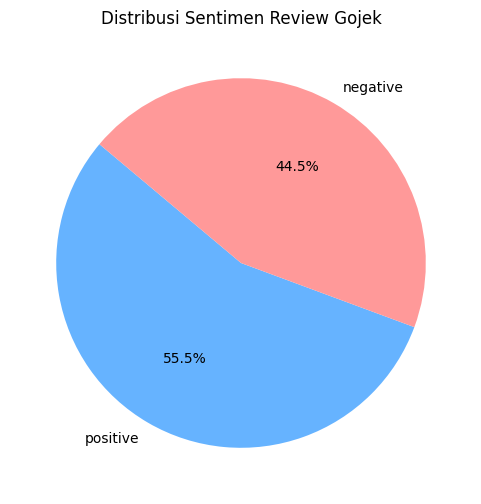

In [ ]:
df['polarity'].value_counts().plot.pie(
    autopct='%1.1f%%',
    figsize=(6, 6),
    startangle=140,
    colors=['#66b3ff', '#ff9999', '#99ff99']
)
plt.ylabel('')
plt.title('Distribusi Sentimen Review Gojek')
plt.show()

In [ ]:
df['polarity'].value_counts()

polarity
positive    38020
negative    30522
Name: count, dtype: int64

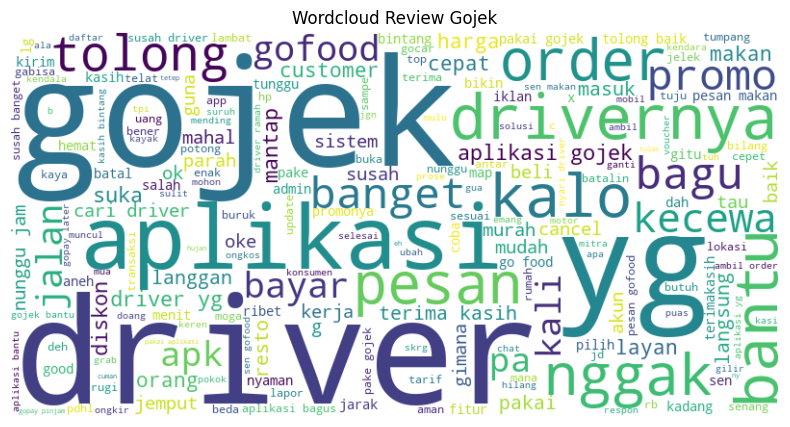

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Review Gojek')
plt.show()

In [20]:
x = df['cleaned']
y = df['polarity']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
max_words = 20000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)
X_train_pad.shape, X_test_pad.shape

((54833, 100), (13709, 100))

In [24]:
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

c:\Users\acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Epoch 1/5
686/686 ━━━━━━━━━━━━━━━━━━━━ 54s 79ms/step - accuracy: 0.9906 - loss: 0.0256 - val_accuracy: 0.9516 - val_loss: 0.1733
Epoch 2/5
686/686 ━━━━━━━━━━━━━━━━━━━━ 44s 64ms/step - accuracy: 0.9930 - loss: 0.0201 - val_accuracy: 0.9471 - val_loss: 0.1847
Epoch 3/5
686/686 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - accuracy: 0.9935 - loss: 0.0188 - val_accuracy: 0.9553 - val_loss: 0.1828
Epoch 4/5
686/686 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - accuracy: 0.9943 - loss: 0.0163 - val_accuracy: 0.9545 - val_loss: 0.1964
Epoch 5/5
686/686 ━━━━━━━━━━━━━━━━━━━━ 39s 57ms/step - accuracy: 0.9950 - loss: 0.0147 - val_accuracy: 0.9555 - val_loss: 0.2084
429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6177
           1       0.96      0.96      0.96      7532

    accuracy                           0.96     13709
   macro avg       0.96      0.96      0.96     13709
weighted avg       0.96      0.96      0.